Project statement The purpose of the project is to forecast six time series (no particular topic) using Python.

Initially we will import some useful libraries into the program

Import libraries into the program

In [57]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import random
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Set seed (42: lucky number)

In [58]:
random.seed(42)

We will use os to retrieve the files used in the program

In [59]:
for dirname, _, filenames in os.walk('C:/Users/panag/Desktop/sarima-model'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:/Users/panag/Desktop/sarima-model\arima.ipynb
C:/Users/panag/Desktop/sarima-model\sample_submission.csv
C:/Users/panag/Desktop/sarima-model\sarima-models.zip
C:/Users/panag/Desktop/sarima-model\sarimax.ipynb
C:/Users/panag/Desktop/sarima-model\test.csv
C:/Users/panag/Desktop/sarima-model\train.csv
C:/Users/panag/Desktop/sarima-model\1\Time Series Forecasting with SARIMA.ipynb
C:/Users/panag/Desktop/sarima-model\2\time-series-forecasting-with-sarima.ipynb


Pandas is a software library written for the Python programming language for data manipulation and analysis. We will use pandas to read the csv files and convert them to dataframes

In [60]:
train = pd.read_csv('C:/Users/panag/Desktop/sarima-model/train.csv')
test = pd.read_csv('C:/Users/panag/Desktop/sarima-model/test.csv')
submission = pd.read_csv('C:/Users/panag/Desktop/sarima-model/sample_submission.csv')

In [61]:
train.isna().sum()

id        0
Serie     0
indice    0
y         0
dtype: int64

In [62]:
test.isna().sum()

id        0
Serie     0
indice    0
dtype: int64

In [63]:
submission_id = submission['id']

We will use a loop to break down the six time series

In [64]:
num_unique = train['Serie'].unique()

In [65]:
for i in train['Serie'].unique():
    locals()['train_' + str(i)] = train[(train.Serie == i)]
    locals()['test_' + str(i)] = test[(test.Serie == i)]

In [66]:
print(train_1.shape, train_2.shape, train_3.shape, train_4.shape, train_5.shape, train_6.shape)
print(test_1.shape, test_2.shape, test_3.shape, test_4.shape, test_5.shape, test_6.shape)

(96, 4) (80, 4) (78, 4) (95, 4) (135, 4) (306, 4)
(32, 3) (26, 3) (26, 3) (32, 3) (45, 3) (102, 3)


Dropping id and Serie

In [67]:
for i in range(1, len(num_unique)+1,1):
    locals()['train_' + str(i)].drop(['id', 'Serie'], axis=1, inplace=True)
    locals()['test_' + str(i)].drop(['id', 'Serie'], axis=1, inplace=True)
    
    locals()['train_' + str(i)]['indice'] = ['train_' + str(i)].index
    locals()['test_' + str(i)]['indice'] = ['test_' + str(i)].index
    
    locals()['train_' + str(i)].drop('indice', axis=1, inplace=True)
    locals()['test_' + str(i)].drop('indice', axis=1, inplace=True)

In [68]:
print(train_1.shape, train_2.shape, train_3.shape, train_4.shape, train_5.shape, train_6.shape)
print(test_1.shape, test_2.shape, test_3.shape, test_4.shape, test_5.shape, test_6.shape)

(96, 1) (80, 1) (78, 1) (95, 1) (135, 1) (306, 1)
(32, 0) (26, 0) (26, 0) (32, 0) (45, 0) (102, 0)


Plotting the time series

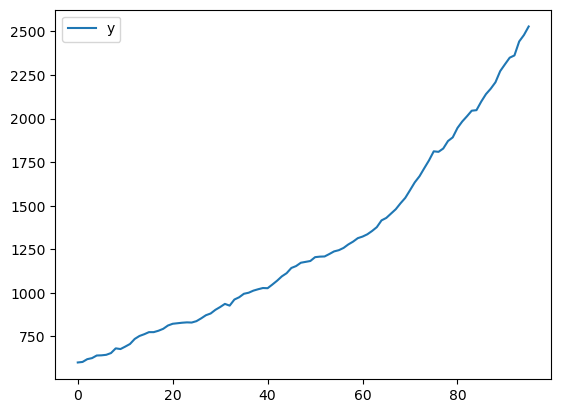

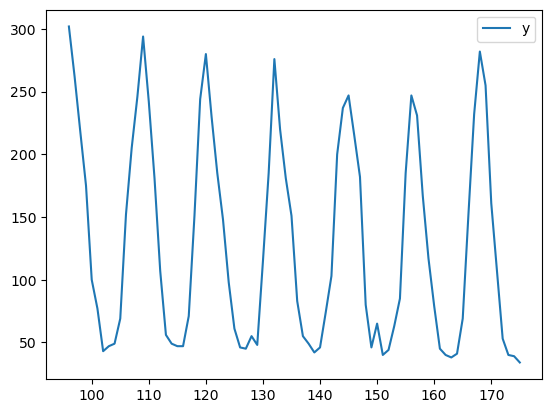

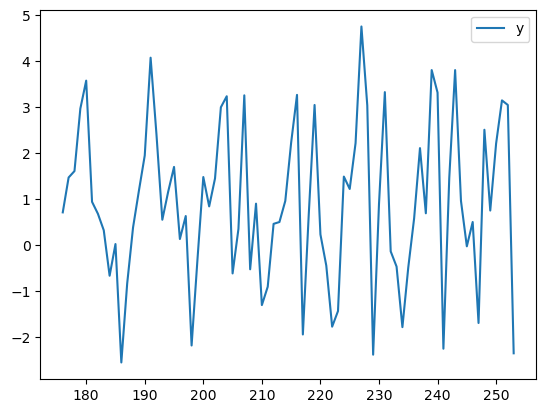

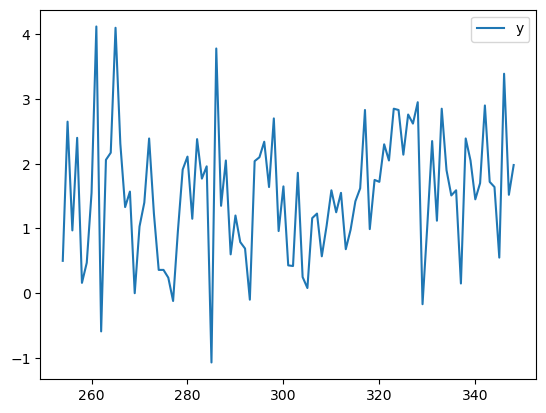

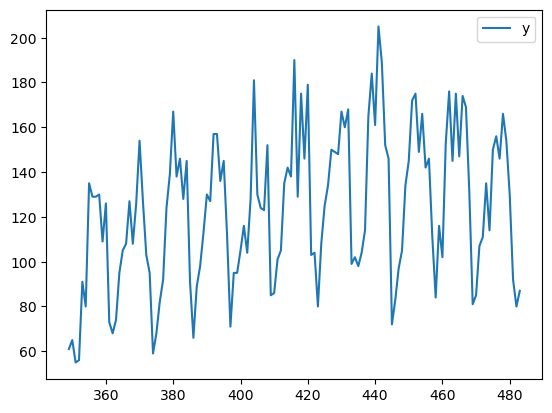

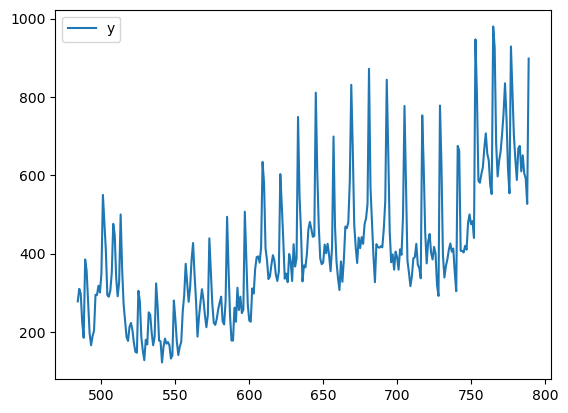

In [69]:
for i in range(1, len(num_unique)+1,1):
    locals()['train_' + str(i)].plot()

We will create a histogram of the time series

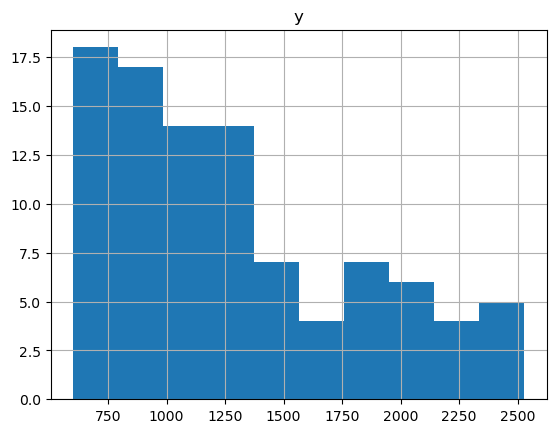

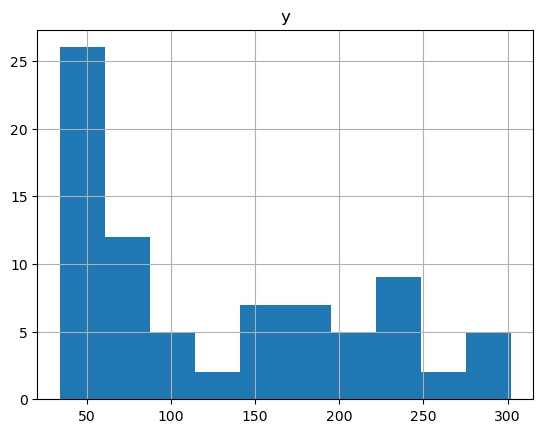

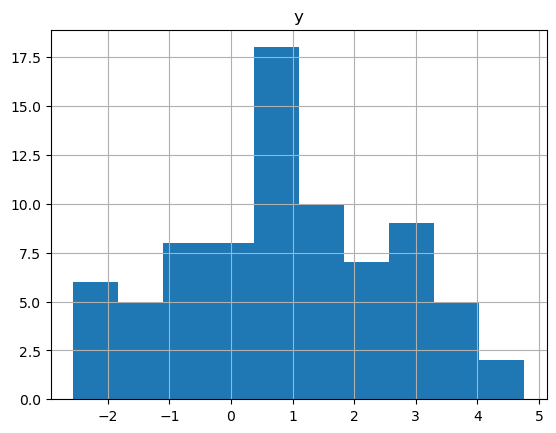

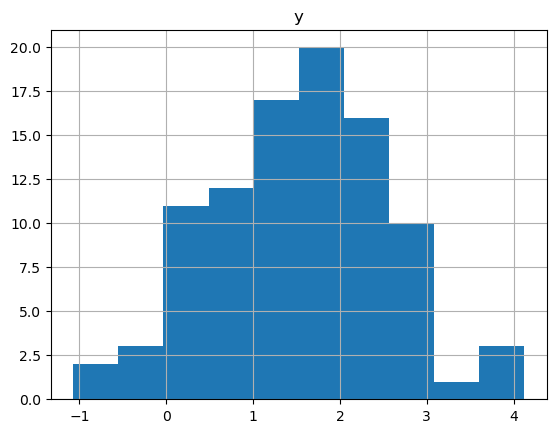

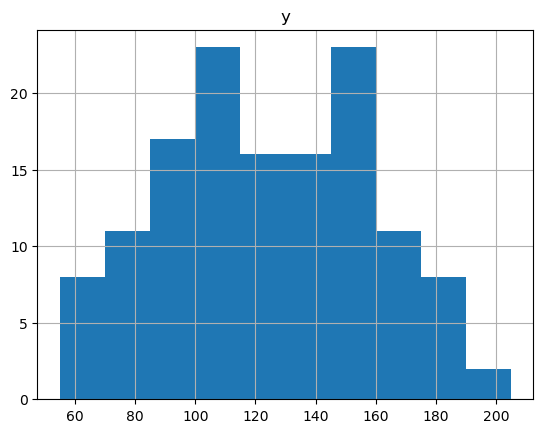

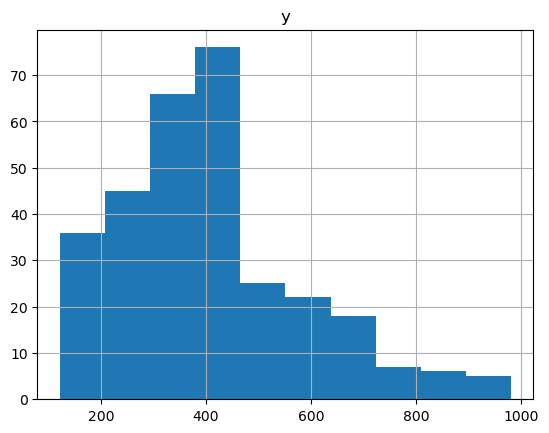

In [70]:
for i in range(1, len(num_unique)+1,1):
    locals()['train_' + str(i)].hist(); plt.show()

Smooth the time series

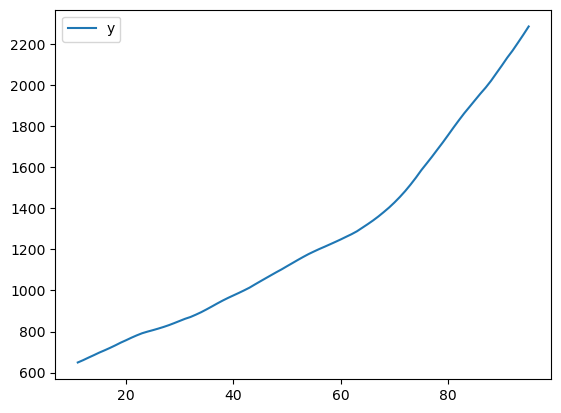

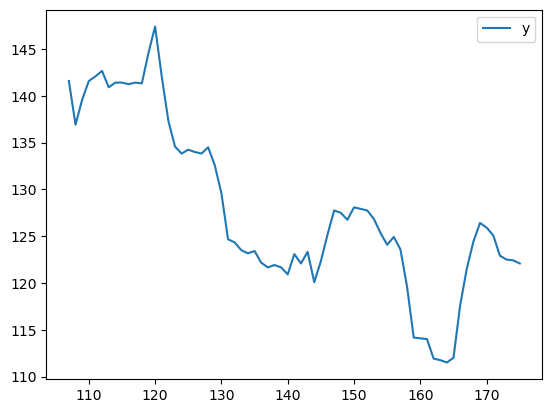

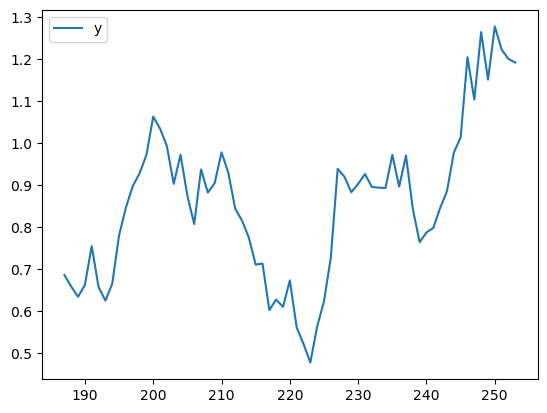

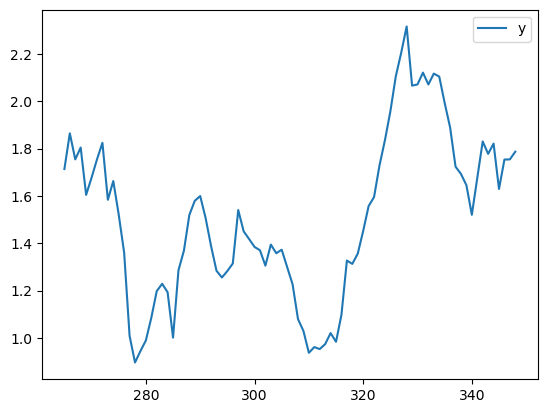

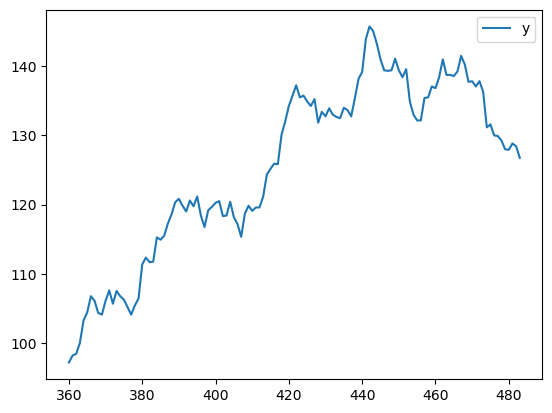

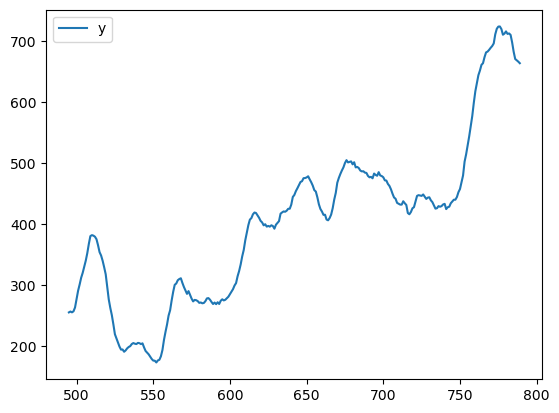

In [71]:
for i in range(1, len(num_unique)+1,1):
    locals()['train_' + str(i)].rolling(window=12).mean().plot()

Checking for stationarity

In [72]:
from statsmodels.tsa.stattools import adfuller

# We will look for p-value. In case, p-value is less than 0.05, the time series
# data can said to have stationarity

for i in range(1, len(num_unique)+1,1):
    adf_result = adfuller(locals()['train_' + str(i)],autolag='AIC')
    print(['train_' + str(i)])
    print("P-value: ", adf_result[1])
    print("ADF statistic:", adf_result[0])

['train_1']
P-value:  1.0
ADF statistic: 8.690476789234202
['train_2']
P-value:  0.6293394879238593
ADF statistic: -1.2996345565313945
['train_3']
P-value:  0.6834372647837543
ADF statistic: -1.1769371507680075
['train_4']
P-value:  1.0359191970985813e-06
ADF statistic: -5.641130684054363
['train_5']
P-value:  0.2513874762586472
ADF statistic: -2.083043139957554
['train_6']
P-value:  0.6009975027051662
ADF statistic: -1.3606318861012545


Splitting the dataframes into testing and validation sets

In [73]:
for i in range(1, len(num_unique)+1,1):
    train_length = int(len(locals()[('train_' + str(i))]) * 0.9)
    copy_train = locals()['train_' + str(i)]
    
    locals()['train_' + str(i)] = copy_train[: train_length]
    locals()['val_' + str(i)] = copy_train[train_length :]

In [74]:
print(np.asarray(train_1).shape, np.asarray(train_2).shape, np.asarray(train_3).shape, np.asarray(train_4).shape, np.asarray(train_5).shape, np.asarray(train_6).shape)
print(np.asarray(val_1).shape, np.asarray(val_2).shape, np.asarray(val_3).shape, np.asarray(val_4).shape, np.asarray(val_5).shape, np.asarray(val_6).shape)
print(test_1.shape, test_2.shape, test_3.shape, test_4.shape, test_5.shape, test_6.shape)

(86, 1) (72, 1) (70, 1) (85, 1) (121, 1) (275, 1)
(10, 1) (8, 1) (8, 1) (10, 1) (14, 1) (31, 1)
(32, 0) (26, 0) (26, 0) (32, 0) (45, 0) (102, 0)


In [75]:
for i in range(1, len(num_unique)+1,1):
    locals()['y_train_' + str(i)] = locals()['train_' + str(i)]['y']
    locals()['y_val_' + str(i)] = locals()['val_' + str(i)]['y']

In [76]:
print(np.asarray(y_train_1).shape, np.asarray(y_train_2).shape, np.asarray(y_train_3).shape, np.asarray(y_train_4).shape, np.asarray(y_train_5).shape, np.asarray(y_train_6).shape)
print(np.asarray(y_val_1).shape, np.asarray(y_val_2).shape, np.asarray(y_val_3).shape, np.asarray(y_val_4).shape, np.asarray(y_val_5).shape, np.asarray(y_val_6).shape)

(86,) (72,) (70,) (85,) (121,) (275,)
(10,) (8,) (8,) (10,) (14,) (31,)


Now we will create the SARIMAX model

In [77]:
import itertools
from statsmodels.tsa.statespace.sarimax import SARIMAX

def sarima_grid_search(y,seasonal_period):
    p = d = q = range(0, 3)
    pdq = list(itertools.product(p, d, q))
    seasonal_pdq = [(x[0], x[1], x[2],seasonal_period) for x in list(itertools.product(p, d, q))]
    
    mini = float('+inf')
    
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(y,
                                                order=param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)

                results = mod.fit(disp=0)
                
                if results.aic < mini:
                    mini = results.aic
                    param_mini = param
                    param_seasonal_mini = param_seasonal

                    print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
            except:
                continue
    print('The set of parameters with the minimum AIC is: SARIMA{}x{} - AIC:{}'.format(param_mini, param_seasonal_mini, mini))
    return



In [78]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model_1 = SARIMAX(y_train_1, order=(0, 2, 2), seasonal_order=(2, 2, 2, 12),enforce_stationarity=True, enforce_invertibility=False).fit(disp=0)
print(model_1.aic)

536.5753444559906


In [79]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model_2 = SARIMAX(y_train_2, order=(2, 1, 1), seasonal_order=(0, 2, 1, 12),enforce_stationarity=True, enforce_invertibility=False).fit(disp=0)
print(model_2.aic)

1493.8053440047465


In [80]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model_3 = SARIMAX(y_train_3, order=(2, 0, 2), seasonal_order=(0, 2, 1, 12),enforce_stationarity=True, enforce_invertibility=False).fit(disp=0)
print(model_3.aic)

1746.9346112481542


In [81]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model_4 = SARIMAX(y_train_4, order=(2, 0, 2), seasonal_order=(0, 2, 2, 12),enforce_stationarity=True, enforce_invertibility=False).fit(disp=0)
print(model_4.aic)

251.05662333579136


In [82]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model_5 = SARIMAX(y_train_5, order=(2, 2, 2), seasonal_order=(2, 2, 2, 12),enforce_stationarity=False, enforce_invertibility=False).fit(disp=0)
print(model_5.aic)

nan


In [83]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model_6 = SARIMAX(y_train_6, order=(0, 2, 2), seasonal_order=(0, 2, 2, 12),enforce_stationarity=True, enforce_invertibility=False).fit(disp=0)
print(model_5.aic)

nan


In this part we will make predictions and plot

In [84]:
def get_yhat(y_train, y_val, model):
    #set index
    y_train_idx = y_train.index
    y_val_idx = y_val.index
# Make the predictions
    y_hat = model.predict(start=len(y_train), end=((len(y_train)+len(y_val))-1), dynamic=False)
    
# Plot the prediction vs test data
    plt.figure(figsize=(10,4))
    plt.plot(y_train_idx, y_train, label='X_train')
    plt.plot(y_val_idx,y_val, label='X_val')
    plt.plot(y_val_idx, y_hat, label='SARIMAX Forecast')
    plt.legend(loc='best')
    plt.title("SARIMAX Forecast")
    plt.show()

    return y_hat

In [85]:
# Calculate MAE and RMSE
def evaluate_prediction(predictions, actual, model_name):
    errors = predictions.ravel() - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()

    print(model_name + ':')
    print('Mean Absolute Error: ', mae)
    print('Root Mean Square Error: ', rmse)
    print('')

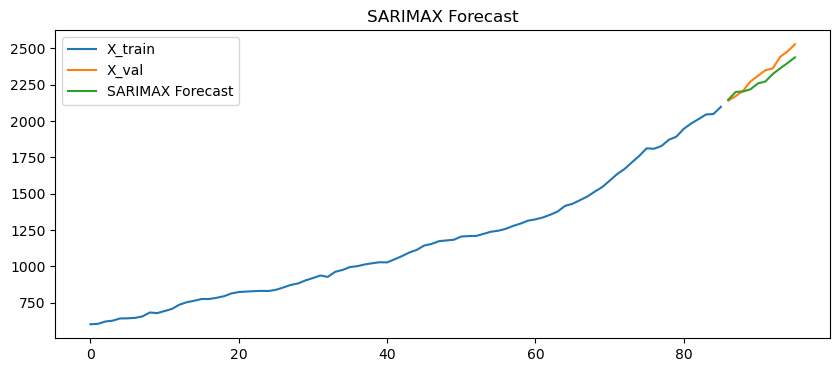

In [86]:
y_hat_1 = get_yhat(y_train_1, y_val_1, model_1)

In [87]:
evaluate_prediction(y_hat_1, y_val_1, 'SARIMAX')

SARIMAX:
Mean Absolute Error:  51.12499402844237
Root Mean Square Error:  58.98977974862743



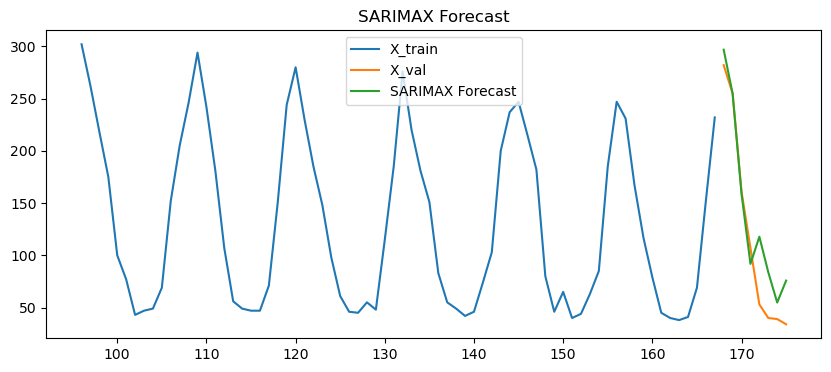

In [88]:
y_hat_2 = get_yhat(y_train_2, y_val_2, model_2)

In [89]:
evaluate_prediction(y_hat_2, y_val_2, 'SARIMAX')

SARIMAX:
Mean Absolute Error:  24.82950140702645
Root Mean Square Error:  32.739896977653785



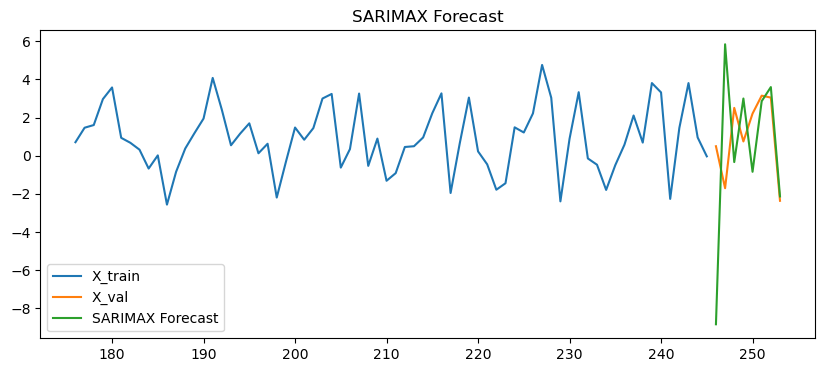

In [90]:
y_hat_3 = get_yhat(y_train_3, y_val_3, model_3)

In [91]:
evaluate_prediction(y_hat_3, y_val_3, 'SARIMAX')

SARIMAX:
Mean Absolute Error:  3.260493386844331
Root Mean Square Error:  4.56665022180175



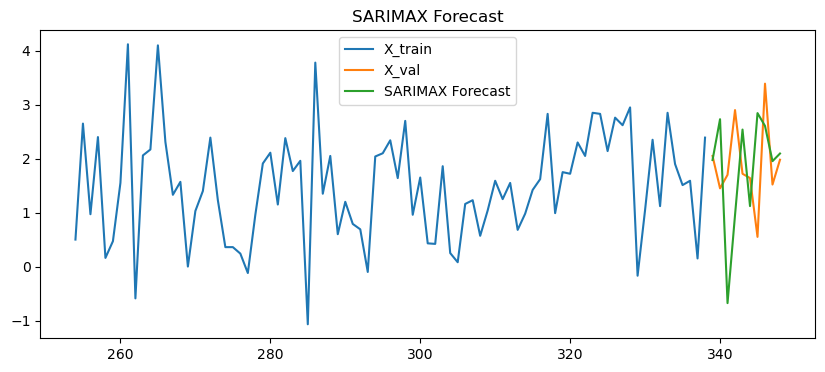

In [92]:
y_hat_4 = get_yhat(y_train_4, y_val_4, model_4)

In [93]:
evaluate_prediction(y_hat_4, y_val_4, 'SARIMAX')

SARIMAX:
Mean Absolute Error:  1.0643894091809556
Root Mean Square Error:  1.3455288644487193



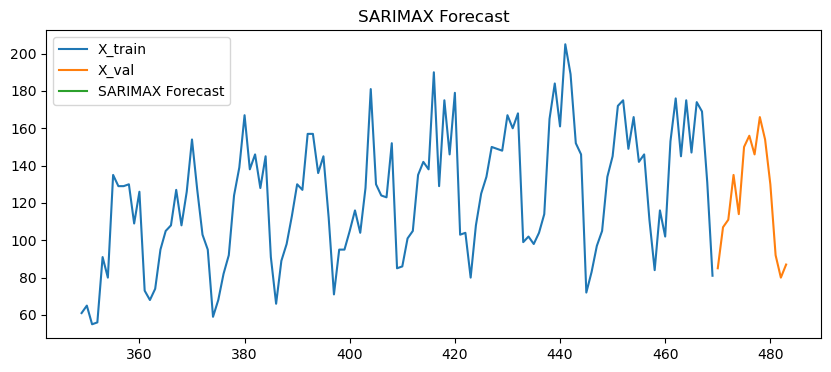

In [94]:
y_hat_5 = get_yhat(y_train_5, y_val_5, model_5)

In [95]:
evaluate_prediction(y_hat_5, y_val_5, 'SARIMAX')

SARIMAX:
Mean Absolute Error:  nan
Root Mean Square Error:  nan



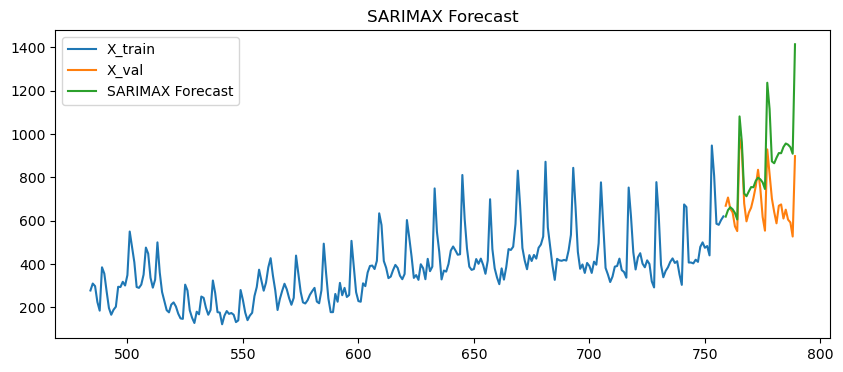

In [96]:
y_hat_6 = get_yhat(y_train_6, y_val_6, model_6)

In [97]:
evaluate_prediction(y_hat_6, y_val_6, 'SARIMAX')

SARIMAX:
Mean Absolute Error:  169.64310883423335
Root Mean Square Error:  216.54943016810242



Now we will make predictions on test set

In [98]:
def get_pred(model, y_train, y_val, test):
    
    len_df = len(y_train) + len(y_val)
    len_test = len(test)
    
# Make the predictions
    pred = model.predict(start=len_df, end=(len_df+len_test)-1, dynamic=False)
    return pred

In [99]:
pred_1 = get_pred(model_1, y_train_1, y_val_1, test_1)
pred_1

96     2446.664938
97     2506.277919
98     2553.459503
99     2616.602469
100    2619.273220
101    2631.356808
102    2678.420701
103    2696.867534
104    2762.967042
105    2802.259967
106    2842.899962
107    2883.466254
108    2888.071157
109    2956.116613
110    3017.045113
111    3090.748139
112    3074.419043
113    3083.432505
114    3132.846161
115    3138.543615
116    3206.131448
117    3246.384380
118    3281.546399
119    3317.213584
120    3307.789364
121    3380.048376
122    3434.889514
123    3510.778406
124    3498.723025
125    3501.204010
126    3550.558087
127    3556.490383
Name: predicted_mean, dtype: float64

In [100]:
pred_2 = get_pred(model_2, y_train_2, y_val_2, test_2)
pred_2

80      77.818006
81     114.818006
82     258.818006
83     318.818006
84     386.454017
85     318.454017
86     190.454017
87     106.454017
88     196.454017
89     162.454017
90     109.454017
91     153.454017
92     154.454017
93     200.454017
94     405.454017
95     445.454017
96     515.908034
97     421.908034
98     261.908034
99     160.908034
100    314.908034
101    280.908034
102    203.908034
103    270.908034
104    270.908034
105    325.908034
Name: predicted_mean, dtype: float64

In [101]:
pred_3 = get_pred(model_3, y_train_3, y_val_3, test_3)
pred_3

78      2.030000
79      4.290000
80      2.060000
81      0.410000
82    -15.872358
83     12.175537
84     -1.240000
85      3.890000
86     -2.370000
87      1.910000
88      3.880000
89     -2.000000
90      2.600000
91      4.770000
92      3.160000
93      0.850000
94    -22.913537
95     18.508306
96     -2.149999
97      4.780000
98     -3.900000
99      0.960000
100     4.160000
101    -1.870000
102     3.170000
103     5.250000
Name: predicted_mean, dtype: float64

In [102]:
pred_4 = get_pred(model_4, y_train_4, y_val_4, test_4)
pred_4

95     0.224841
96     3.245291
97     2.526247
98     3.608044
99    -0.523203
100    1.568162
101    3.296996
102    1.435990
103    3.065580
104    3.230971
105    2.075157
106    2.116739
107   -0.346892
108    3.399849
109    2.285260
110    3.637996
111   -1.236858
112    1.325104
113    3.241007
114    1.008676
115    2.640108
116    3.324336
117    1.797028
118    1.879369
119   -1.033052
120    3.583281
121    2.209774
122    3.958623
123   -1.550293
124    1.572752
125    3.744549
126    1.186369
Name: predicted_mean, dtype: float64

In [103]:
pred_5 = get_pred(model_5, y_train_5, y_val_5, test_5)
pred_5

135   NaN
136   NaN
137   NaN
138   NaN
139   NaN
140   NaN
141   NaN
142   NaN
143   NaN
144   NaN
145   NaN
146   NaN
147   NaN
148   NaN
149   NaN
150   NaN
151   NaN
152   NaN
153   NaN
154   NaN
155   NaN
156   NaN
157   NaN
158   NaN
159   NaN
160   NaN
161   NaN
162   NaN
163   NaN
164   NaN
165   NaN
166   NaN
167   NaN
168   NaN
169   NaN
170   NaN
171   NaN
172   NaN
173   NaN
174   NaN
175   NaN
176   NaN
177   NaN
178   NaN
179   NaN
Name: predicted_mean, dtype: float64

In [104]:
pred_6 = get_pred(model_6, y_train_6, y_val_6, test_6)
pred_6

306    1291.290129
307    1043.968821
308    1039.640131
309    1068.832003
310    1091.835609
          ...     
403    3381.425854
404    3415.276291
405    3477.701693
406    3516.678618
407    3522.708783
Name: predicted_mean, Length: 102, dtype: float64

Concatenate six predictions into one series

In [105]:
predictions = pd.concat([pred_1, pred_2, pred_3, pred_4, pred_5, pred_6])
predictions

96     2446.664938
97     2506.277919
98     2553.459503
99     2616.602469
100    2619.273220
          ...     
403    3381.425854
404    3415.276291
405    3477.701693
406    3516.678618
407    3522.708783
Name: predicted_mean, Length: 263, dtype: float64

At last, we will prepare the submission file

In [106]:
my_submission = pd.DataFrame({'id': submission_id, 'y': predictions.values})
my_submission.to_csv('my_submission.csv', index=False)
my_submission = pd.read_csv('my_submission.csv')
my_submission

,id,y
0,791,2446.664938
1,792,2506.277919
2,793,2553.459503
3,794,2616.602469
4,795,2619.273220
...,...,...
258,1049,3381.425854
259,1050,3415.276291
260,1051,3477.701693
261,1052,3516.678618
